# 01 - Tuto xarray

This notebook is set to familiarize with the `xarray` package that you will have to use in other notebooks.

## Constraints

+ 🚨 Only cells with the comment `# NOTE: Fill me!` should be filled
+ 🚨 Notebook should be saved and commited **with** outputs for the submission


+ ⚠️ The solution only requires packages listed in the `requirements/requirements.txt`

## Note

+ The `assert` statements in the notebook are here to guide the project.
However, successful `assert` statements does not guarantee that your code is correct.


In [1]:
!pip install -r requirements/requirements.txt

     ---------------------------------------- 6.6/6.6 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 162.7/162.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [2]:
import xarray as xr
import pandas as pd
from pathlib import Path
from datetime import datetime

%reload_ext autoreload
%autoreload 2

# 1. Parameters

In [3]:
DATA_PATH = Path("data")
RASTER_PATH = DATA_PATH / "rasters"
CSV_PATH = DATA_PATH / "csv"

# 2. Data

## 2.1 Download data

In [5]:
raster_path = RASTER_PATH / "raster_test.nc"

## 2.2 Load data

`xarray` doc: https://tutorial.xarray.dev/intro.html

`xarray.DataArray` is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:

- values: a numpy.ndarray holding the array’s values

- dims: dimension names for each axis (e.g., ('x', 'y', 'z'))

- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)

- attrs: dict to hold arbitrary metadata (attributes)

`xarray.Dataset`

A dict-like collection of `DataArray` objects with aligned dimensions. Thus, most operations that can be performed on the dimensions of a single `DataArray` can be performed on a dataset. Datasets have data variables (see Variable below), dimensions, coordinates, and attributes.

⚠️ **In the following and in all notebooks, the term raster will denominate a `xarray.DataArray` or `xarray.Dataset`** ⚠️

In [6]:
raster = xr.load_dataset(raster_path).drop("spatial_ref")
raster

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 4, time: 365)
Coordinates:
  * longitude  (longitude) float64 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    max_temp   (time, latitude, longitude) float32 21.72 22.02 ... 26.91 24.88
    avg_temp   (time, latitude, longitude) float32 8.754 8.896 ... 9.257 9.204

Here the raster is composed of 3 coordinates (`longitude`, `latitude` and `time`) and has 2 variables:
- `max_temp`: maximum temperature over one day
- `avg_temp`: average temperature over one day

# 3. Familiarize with xarray

You can have a look at the xarray doc for indexing and selecting: https://docs.xarray.dev/en/stable/user-guide/indexing.html

#### Let's now look at the variables: for example max_temp

It is a `xarray.DataArray`

In [7]:
raster["max_temp"]

# DG
#raster.max_temp

<xarray.DataArray 'max_temp' (time: 365, latitude: 4, longitude: 5)>
array([[[21.723846, 22.02069 , 22.58197 , 22.58197 , 22.947021],
        [21.446747, 21.446747, 22.02069 , 22.355469, 22.68747 ],
        [20.954376, 21.446747, 21.84906 , 22.209167, 22.551025],
        [21.044403, 21.38977 , 21.946838, 22.214111, 22.200043]],

       [[16.736298, 16.722961, 16.862915, 16.862915, 17.534637],
        [16.308655, 16.308655, 16.722961, 16.632904, 16.997955],
        [15.847961, 16.308655, 16.628693, 16.681458, 17.066895],
        [16.705353, 17.042969, 17.556427, 19.21286 , 18.664246]],

       [[16.134949, 16.129303, 16.074463, 16.074463, 16.453552],
        [15.752319, 15.752319, 16.129303, 16.064606, 16.25592 ],
        [15.357727, 15.752319, 16.068817, 16.187683, 16.459198],
        [15.793091, 16.19754 , 16.703247, 18.015717, 17.67389 ]],

       ...,

       [[17.751251, 17.942566, 18.287933, 18.287933, 18.911102],
        [17.08728 , 17.08728 , 17.942566, 18.043854, 18.418762],
        [16.37619 , 17.08728 , 17.653503, 17.946106, 18.413116],
        [16.936066, 17.548004, 18.325195, 20.108246, 19.649658]],

       [[17.33136 , 17.696411, 18.419464, 18.419464, 18.840057],
        [16.732788, 16.732788, 17.696411, 17.948914, 18.234467],
        [15.992859, 16.732788, 17.39325 , 17.650696, 18.015717],
        [16.350159, 17.020477, 17.799805, 18.875244, 18.554504]],

       [[24.206726, 24.052002, 23.352844, 23.352844, 23.694672],
        [24.564056, 24.564056, 24.052002, 23.88388 , 23.983765],
        [24.23767 , 24.564056, 24.72229 , 24.669556, 24.564056],
        [25.204803, 25.503723, 25.952484, 26.91397 , 24.878448]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 147.1 147.2 147.3 147.4 147.5
  * latitude   (latitude) float64 -42.34 -42.45 -42.55 -42.66
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  spatial_ref

Let's say we want to select the grid cell at position [0,0], then it becomes as follows:

In [18]:
#raster["max_temp"][dict(longitude=0, latitude=0)]

#DG
#raster.max_temp.isel(longitude=0,latitude=0)

<xarray.DataArray 'max_temp' ()>
array(8.619507, dtype=float32)
Coordinates:
    longitude  float64 147.1
    latitude   float64 -42.34
    time       datetime64[ns] 2010-07-01
Attributes:
    grid_mapping:  spatial_ref

And we can plot the timeseries over the year 2010:

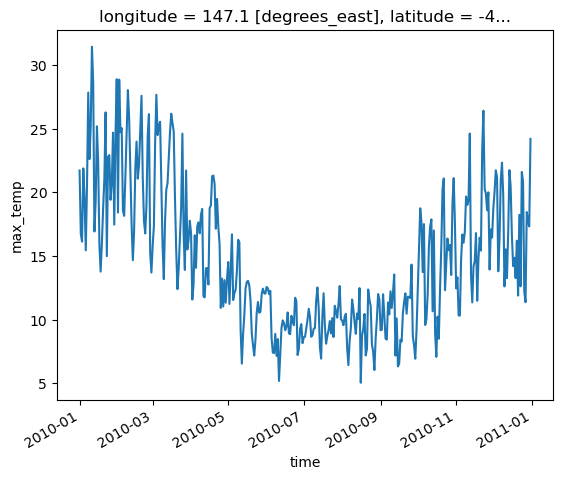

In [15]:
raster["max_temp"][dict(longitude=0, latitude=0)].plot()

If we now want to get the value for July, 1st of 2010:

In [16]:
raster["max_temp"][dict(longitude=0, latitude=0)].sel(dict(time=datetime(2010, 7, 1))).values

#DG
#raster.max_temp.isel(longitude=0,latitude=0).sel(time=datetime(2010, 7, 1))

array(8.619507, dtype=float32)

#### Similarly, let's say, we have the coordinates (longitude and latitude) of a point and we want to know the min and mean temperature on the 5th of December 2010:

The coordinates here at in the geodesic Coordinate reference system (CRS)

For more info on CRS, please have a look at: https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

In [68]:
point_latitude = -42.5776
point_longitude = 147.3224
point_date = datetime(2010, 12, 5)

2010-12-05 00:00:00


In [28]:
raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)

# DG
#raster.sel(longitude=point_longitude, latitude=point_latitude, time=point_date, method="nearest",)

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float64 147.3
    latitude   float64 -42.55
    time       datetime64[ns] 2010-12-05
Data variables:
    max_temp   float32 14.41
    avg_temp   float32 4.911

array(4.9108887, dtype=float32)

And let's say, you want to access the mean temperature:

In [23]:
point_avg_temp = raster.sel(
    dict(longitude=point_longitude, latitude=point_latitude, time=point_date),
    method="nearest",
)["avg_temp"].values
point_avg_temp

#DG
#point_avg_temp=raster.avg_temp.sel(longitude=point_longitude, latitude=point_latitude, time=point_date, method="nearest").values

array(4.9108887, dtype=float32)

# 4. Task

Your task here is to find the corresponding features associated to an ignition point. More precisely, you need to determine the elevation, population density, maximum and average temperature at the location of the ignition point and the day it occurred.

## 4.1 Load data

### 4.1.1 Rasters

In [132]:
topo_path = RASTER_PATH / "topo.nc"
weather_path = RASTER_PATH / "weather.nc"

In [74]:
topo_xr = xr.load_dataset(topo_path)
weather_xr = xr.load_dataset(weather_path)

#DG
topo_xr # Why not removing variable spatial_ref like on the previous example?
weather_xr # Why not removing variable spatial_ref like on the previous example?

#weather_xr.time

<xarray.Dataset>
Dimensions:      (longitude: 8, latitude: 7, time: 8096)
Coordinates:
  * longitude    (longitude) float64 146.9 147.0 147.1 ... 147.4 147.5 147.7
  * latitude     (latitude) float64 -42.24 -42.34 -42.45 ... -42.76 -42.87
  * time         (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2022-03-01
Data variables:
    spatial_ref  int64 0
    max_temp     (time, latitude, longitude) float32 nan nan 18.43 ... nan nan
    avg_temp     (time, latitude, longitude) float32 nan nan 5.083 ... nan nan

### 4.1.2 Ignition point

In [123]:
ignition_point_path = CSV_PATH / "ignition_points.csv"


In [124]:
df_ignition = pd.read_csv(ignition_point_path, index_col=0)
df_ignition


,Date,latitude,longitude
0,2002-11-11,-42.5618,147.4595


## 4.2 Map features

🚨 You need to complement the dataframe with the raster features. 🚨

You need to use the 2 rasters and extract the information corresponding to the ignition point. You have to determine the elevation, population density, maximum and average temperature at the location of the ignition point at the time of ignition.

The expected result is shown below:

In [125]:
# NOTE: Fill me
#df_ignition = "fill with proper dataframe"


#DG
# Ignition point coordinates
#type(df_ignition.Date.iloc[0])
ignition_DatePoint = datetime.strptime(df_ignition.Date.iloc[0], '%Y-%m-%d')
#print(ignition_DatePoint)
ignition_latPoint=df_ignition.latitude.iloc[0]
ignition_lonPoint=df_ignition.longitude.iloc[0]

# Adding variables max_temp/avg_temp (from weather_xr) and elevation/pop_dens (from topo_xr)
# For future comparison: Putting them at the right format and Rounding them at first decimal
df_ignition['elevation']=topo_xr.elevation.sel(longitude=ignition_lonPoint, latitude=ignition_latPoint, method="nearest").values.astype('int64')
df_ignition['pop_dens']=topo_xr.pop_dens.sel(longitude=ignition_lonPoint, latitude=ignition_latPoint, method="nearest").values.astype('float64').round(1)
df_ignition['max_temp']=weather_xr.max_temp.sel(longitude=ignition_lonPoint, latitude=ignition_latPoint, time=ignition_DatePoint, method="nearest").values.astype('float64').round(1)
df_ignition['avg_temp']=weather_xr.avg_temp.sel(longitude=ignition_lonPoint, latitude=ignition_latPoint, time=ignition_DatePoint, method="nearest").values.astype('float64').round(1)


# For future comparison: rounding latitude and longitude at first decimal
#df_ignition.latitude=df_ignition.latitude.round(1)
#df_ignition.longitude=df_ignition['longitude'].round(1)
# Comment: Not applied finally, better to have the exact coordinates since we use the nearest method

df_ignition

,Date,latitude,longitude,elevation,pop_dens,max_temp,avg_temp
0,2002-11-11,-42.5618,147.4595,388,2.5,19.3,4.9


In [127]:
expected_dataframe = pd.DataFrame(
    {
        "Date": {0: "2002-11-11"},
        "latitude": {0: -42.6},
        "longitude": {0: 147.5},
        "elevation": {0: 388},
        "pop_dens": {0: 2.5},
        "max_temp": {0: 19.3},
        "avg_temp": {0: 4.9},
    }
)


#DG
#expected_dataframe

In [131]:
pd.testing.assert_frame_equal(df_ignition, expected_dataframe, rtol=1e-2)

---

# END OF SCRIPT